In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator

file = './logs/linpack_40_3_10_1_20_4_40_1_16_2_0.csv'

data = pd.read_csv(file, delimiter=';')

data = data.apply(pd.to_numeric, errors='ignore')

columns_to_sum = ['L1_HIT', 'L2_HIT', 'L3_HIT', 'L1_WB', 'L2_WB', 'L3_WB', 'L1_SWAP', 'L2_SWAP', 'L3_SWAP', 'DDR_RAS']# 'DDR_CAS', 

window_size = 1000
rolling_sums = data[columns_to_sum].rolling(window=window_size).sum()

reduced_rolling_sums = rolling_sums[::1000].copy()
reduced_rolling_sums['Trace_No'] = data['Trace_No'][::1000].values

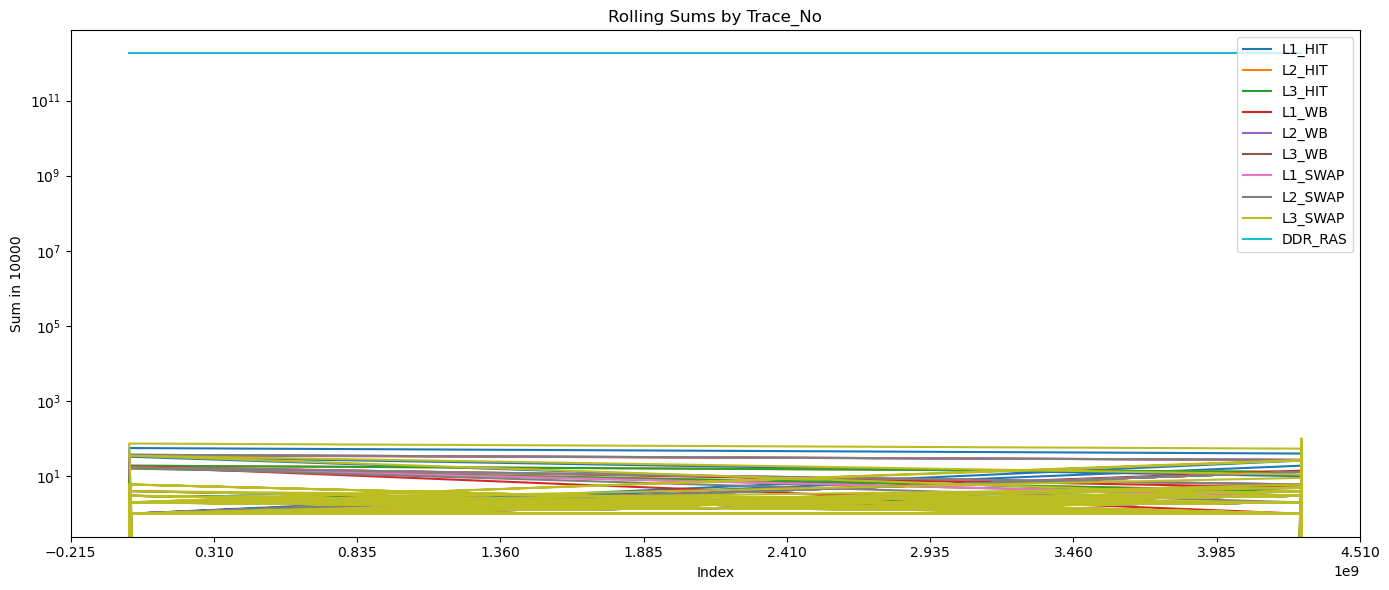

In [22]:
fig, axs = plt.subplots(figsize=(14, 6), sharex=True)

for col in columns_to_sum:
    axs.plot(reduced_rolling_sums['Trace_No'], reduced_rolling_sums[col], label=col)
axs.set_ylabel('Sum in 10000')
axs.set_yscale('log')
axs.legend(loc='upper right')
axs.set_title('Rolling Sums by Trace_No')
axs.set_xlabel('Index')
axs.xaxis.set_major_locator(LinearLocator(numticks=10))

plt.tight_layout()
plt.show()